# Wine Quality
This code aims to evaluate wine quality based on multiple different factors, using classification, regression & neural networks.

## 1 - Library Imports

In [11]:
import pandas as pd #used for dataframe

from sklearn.preprocessing import PolynomialFeatures #polynomial regression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier #multi-classification
from sklearn.metrics import mean_squared_error

#These are all the models I have used in the code
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor


from matplotlib.pyplot import bar 


## 2 - Data Preprocessing
The first step of preprocessing involved importing the dataset.

In [3]:
df = pd.read_csv("/Users/mariamelantably/Desktop/programs/vais internship/winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


I then converted the wine-type data into a numerical quantity - assigning 0 to white wines and 1 to red wines

In [4]:
#encode the wine type
for i in range(df.shape[0]):
    if df["type"][i] == "white":
        df.loc[i, "type"] = 0
    else:
        df.loc[i, "type"] = 1

Following this, the rest of the fields are then normalised to fit them between 0 and 1, and any NaN values are replaced with 0s in the dataset.

In [5]:
categories_to_normalise = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
df[categories_to_normalise] = df[categories_to_normalise].apply(lambda x: (x - x.min())/(x.max() - x.min()))
df.fillna(0, inplace= True)

Then, the dataset is divided into the inputs and target variables, and the set is split in to training and testing data. I decided to use a 4:1 train-test split to give the model sufficient data to learn, without overfitting the model.

For classificiation, I used quality as the target variable. For regression, I chose density as the target variable.

In [7]:
y_c = df["quality"]
X_c = df.drop(["quality"], axis = 1)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.20)

y_r = df["density"]
X_r = df.drop(["density"], axis = 1)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.20)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.217054,0.129213,0.115942,6
1,0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.449612,0.151685,0.217391,6
2,0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.418605,0.123596,0.304348,6
3,0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.364341,0.101124,0.275362,6
4,0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.364341,0.101124,0.275362,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,0.198347,0.346667,0.048193,0.021472,0.134551,0.107639,0.087558,0.565891,0.202247,0.362319,5
6493,1,0.173554,0.313333,0.060241,0.024540,0.088040,0.131944,0.103687,0.620155,0.000000,0.463768,6
6494,1,0.206612,0.286667,0.078313,0.026074,0.111296,0.097222,0.078341,0.542636,0.297753,0.434783,6
6495,1,0.173554,0.376667,0.072289,0.021472,0.109635,0.107639,0.087558,0.658915,0.275281,0.318841,5


## 3 - Classification
For this dataset, I decided to use mutli-classification, specifically a One-vs-All classifier, to decide which quality each wine would be assigned to. I used many different classifiers for this, including:
- Support Vector Machines
- Logistic Regression
- Random Forest Classifier
- AdaBoost
- Gradient Boosting

In [9]:
#OneVsRestClassifier
clf_svm = OneVsRestClassifier(SVC()).fit(X_train_c, y_train_c)
clf_logreg = OneVsRestClassifier(LogisticRegression()).fit(X_train_c, y_train_c)
clf_rf = OneVsRestClassifier(RandomForestClassifier()).fit(X_train_c, y_train_c)
clf_ada = OneVsRestClassifier(AdaBoostClassifier()).fit(X_train_c, y_train_c)
clf_gb = OneVsRestClassifier(GradientBoostingClassifier()).fit(X_train_c, y_train_c)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R

For each model, I then calculated the precision of the predictions on the test data - the total number the model predicted correctly divided by the number of predictions. This is then displayed in the below bar graph, which showed that the random forest performed the best out of all the classifiers in the following model, achieving a precision of nearly 70%.

<BarContainer object of 5 artists>

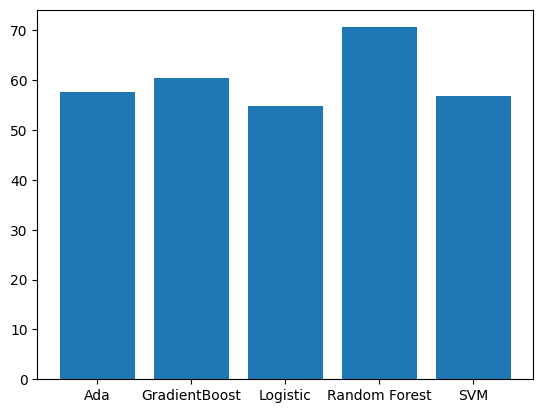

In [12]:
clfs = [clf_ada, clf_gb, clf_logreg, clf_rf, clf_svm]
percents = []
num = len(y_test_c)
for c in clfs:
    y_pred = c.predict(X_test_c)
    corr = 0
    for i in range(num):
        if y_test_c.to_numpy()[i] == y_pred[i]:
            corr += 1
    percents.append(100*(corr/num))

bar(['Ada', 'GradientBoost', 'Logistic', 'Random Forest', 'SVM'], percents, label = "Precision of Classification Models")



## 4 - Linear Regression
I also decided to test whether or not regression models will be accurate at predicting wine quality. To test their ability accurately, all predictions are rounded to the nearest integer then compared to the original quality values. The following models were tested:
- Linear Regression
- Ridge Regression
- Elastic Net Regression
- Lasso Regression

In [28]:
lin_reg = LinearRegression().fit(X_train_r, y_train_r)
ridge = Ridge(alpha = 1.0).fit(X_train_r,y_train_r)
elast = ElasticNet().fit(X_train_r, y_train_r)
lasso = Lasso().fit(X_train_r, y_train_r)
regressors = [lin_reg, ridge, elast, lasso]

For each model, the precision was measured and then plotted on the bar charts. Linear & Ridge Regression performed the best, with precisions over 50%, but did not compare to random forest classification.

<BarContainer object of 4 artists>

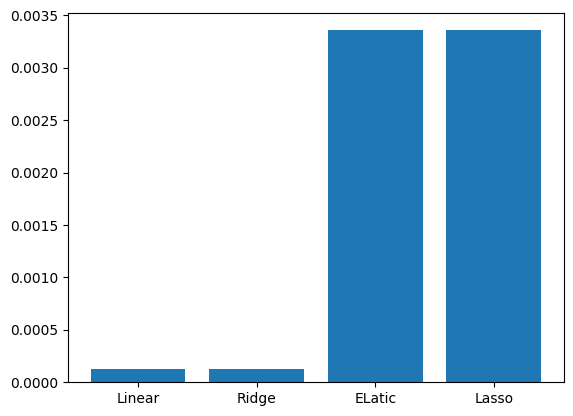

In [33]:
percents_regr = []
for r in regressors:
    y_pred = r.predict(X_test_r)
    percents_regr.append(mean_squared_error(y_test_r, y_pred))
bar(['Linear', 'Ridge', 'ELatic', 'Lasso'], percents_regr, label = "MSE of Regression Models")
    

## 5 - Polynomial Regression
I decided to test whether or not the model could perform better using polynomial regression as opposed to linear regression. I tested degrees 2, 3, and 4 of polynomial regression, then determined their precisions and plotted them on a bar chart. 

<BarContainer object of 3 artists>

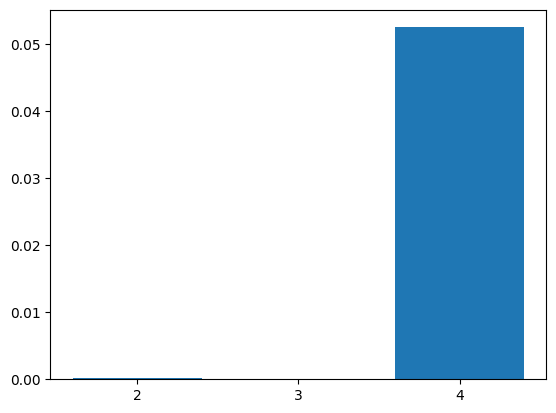

In [34]:
results = []
for i in range(2,5):
    X_new = PolynomialFeatures(degree=i).fit_transform(X_r)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_new, y_r, test_size=0.25)
    poly_reg = LinearRegression().fit(X_train_poly, y_train_poly)
    y_pred_poly = poly_reg.predict(X_test_poly)
    results.append(mean_squared_error(y_test_poly, y_pred_poly))
bar(['2', '3', '4'], results, label = "Precision of Polynomial Regression Degrees")


## 6 - Neural Networks
Then, I looked into using a neural network model for prediction, using multi-layer perceptron, to represent nonlinear patterns. 

### Classification
The first implementation is the model as an classification algorithm using softmax as the output function. I used hyperparameter tuning, experimenting with the different parameters, to maximise the precision. 

In [18]:
mlp_class = MLPClassifier(learning_rate_init = 0.001, max_iter = 350, 
                          hidden_layer_sizes = (500, 250,200,100,75,50,25)).fit(X_train_c, y_train_c)
y_pred = mlp_class.predict(X_test_c)
print(y_pred)
corr = 0
for i in range(num):
    if y_test_c.to_numpy()[i] == y_pred[i]:
        corr += 1
print((corr/num)*100)

[8 6 7 ... 6 6 6]
61.53846153846154


### Regression
Then, I tested the neural network using a regression algorithm as opposed to classification, which optimises using mean squared error to train. 

In [38]:
mlp_reg = MLPRegressor(hidden_layer_sizes = (500, 250,200,100,75,50,25)).fit(X_train_r, y_train_r)
y_pred_reg = mlp_reg.predict(X_test_r)
print(y_pred_reg)
print(mean_squared_error(y_test_r, y_pred_reg))

[0.18832972 0.10782641 0.19294085 ... 0.11521431 0.06556447 0.08405359]
0.00016519606188538055


## 7 - Correlation Analysis
Finally, I analysed which features correlated most with the quality of the wine, revealing that alcohol and citric acid had the highest positive correlation with quality, while density had the most negative correlation with quality


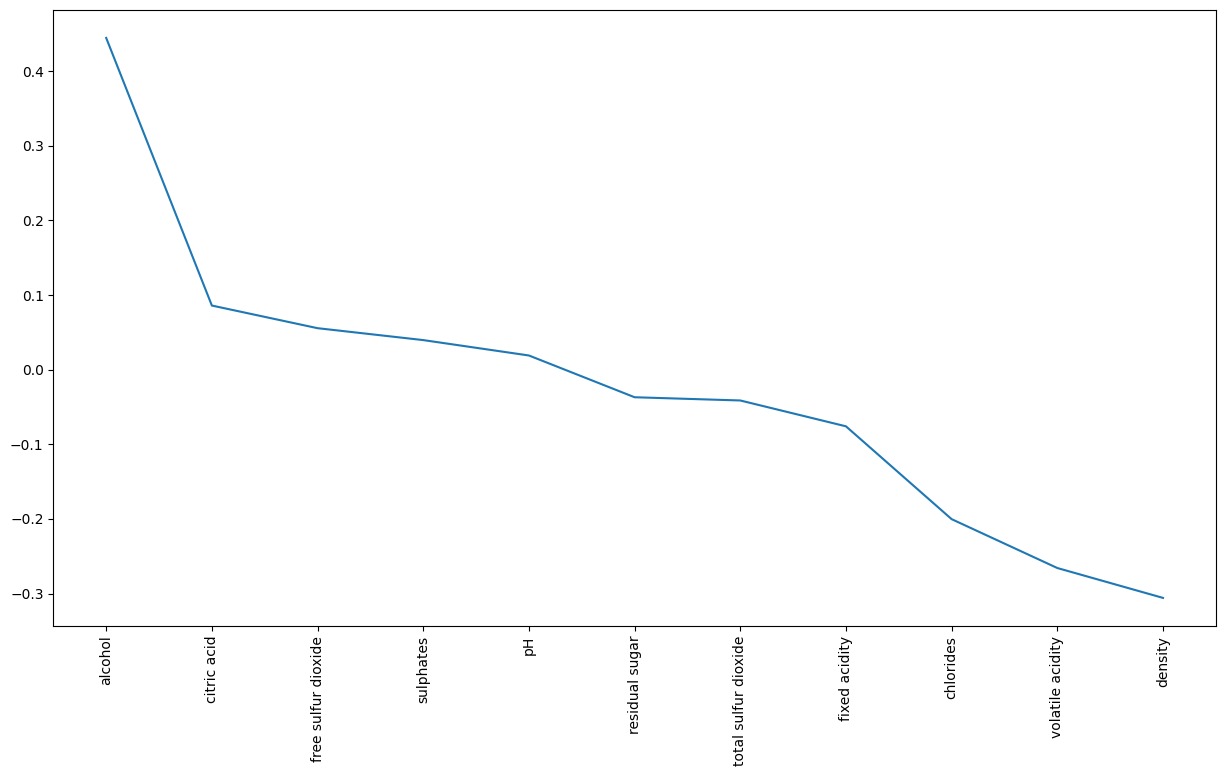

In [39]:
columns_to_study = df.columns.tolist()[1:]
x = df[columns_to_study].corr()

correlations_with_success = x["quality"].sort_values(ascending = False).drop("quality")
correlations_with_success = correlations_with_success
plt.figure(figsize=(15,8))
plt.plot(correlations_with_success.index, correlations_with_success.to_list())
plt.xticks(correlations_with_success.index, rotation='vertical')
plt.show()
